# The Puget Story

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm 
from salishsea_tools import viz_tools, visualisations
import matplotlib as mpl
import pandas as pd
import matplotlib.ticker as ticker
# import salishsea_tools.river_202108 as rivers

## Imports

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
e3t_1d = mesh.e3t_1d.rename({'z':'depth'}).isel(t=0)
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
e3t_3d = mesh.e3t_0.rename({'z':'depth', 'y':'gridY', 'x':'gridX'}).isel(t=0)
tmask = tmask.rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
mmask = 1 - tmask

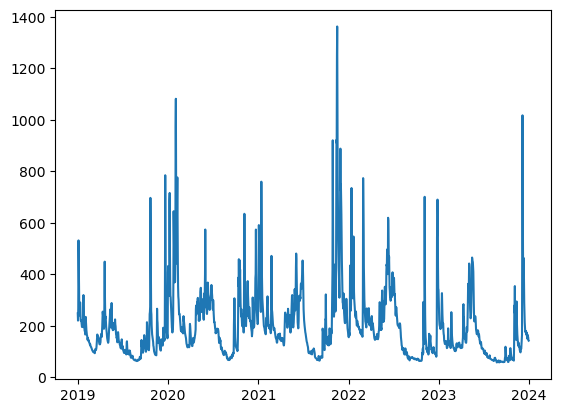

In [4]:
river_dict = {'fraser_river': 'Fraser [m^3/s]', 'nooksack_river': 'Nooksack [m^3/s]', 'skagit_river': 'Skagit1 [m^3/s]', 'snohomish_river': 'SnohomishAllenQuilceda [m^3/s]', \
              'nisqually_river': 'NisquallyMcAllister [m^3/s]', 'elwha_river': 'Elwha [m^3/s]', 'cowichan_river': 'Cowichan1 [m^3/s]', \
              'nanaimo_river': 'Nanaimo1 [m^3/s]', 'puntledge_river': 'Puntledge [m^3/s]', 'salmon_river': 'SalmonSayward [m^3/s]', 'homathko_river': 'Homathko [m^3/s]', \
              'squamish_river': 'Squamish [m^3/s]'}

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_vol_ts_all12_20190101_20231231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()
# river_flows_202108

# river_flows_202108.loc[:, (river_flows_202108.columns != 'Unnamed: 0') & (river_flows_202108.columns != 'date') & (river_flows_202108.columns != 'month') & (river_flows_202108.columns != 'dayofyear')].plot()
plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)
# plt.plot(daily_clim_202108['dayofyear'], daily_clim_202108['Skagit1 [m^3/s]'].values)

In [5]:
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [6]:
# dimensions: gridY, gridX, time
vol_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [7]:
phys_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2023, 2023))
phys_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2022, 2022))
phys_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2021, 2021))
phys_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2020, 2020))
phys_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2019, 2019))

In [8]:
# meters_sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2019, 2019))
# meters_sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2020, 2020))
# meters_sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2021, 2021))
# meters_sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2022, 2022))
# meters_sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_meters/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_meters_depsum.nc'.format(2023, 2023))

In [9]:
# meters_2023_mon = sum_2023_mon * (1/area)
# meters_2022_mon = sum_2022_mon * (1/area)
# meters_2021_mon = sum_2021_mon * (1/area)
# meters_2020_mon = sum_2020_mon * (1/area)
# meters_2019_mon = sum_2019_mon * (1/area)

In [10]:
river_keys = list(sum_2019_mon.keys())

In [11]:
pal_IBM7 = ['#1F5AF5', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#97C042']
pal_IBM11 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#8A190D', '#711C32', '#97C042', '#8F4691', '#959F06', '#314527']

pal_CBF7 = ['#005AB5', '#DC3220', '#2C3458', '#A507BB', '#E69E42', '#6A8A2F', '#5A2050']

rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']

In [12]:
markers_list = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '*', '+', '|', '_', 'd']

year_markers = ['o', 's', '^', 'D', 'x']
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]

colors_list8 = rainbow_bright + rainbow_muted
lines_list8 = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

## Functions

In [13]:
# def make_1d_sum(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
#         all_1d = all_1d + next

#     return all_1d

In [14]:
# def make_1d_mean(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
#         all_1d = all_1d + next

#     return all_1d

In [15]:
# def make_meters(ds, reg_list):
#     all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).mean(dim='gridY').mean('gridX')
#     for region in reg_list[1:]:
#         next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).mean(dim='gridY').mean('gridX')
#         all_1d = all_1d + next

#     return all_1d

In [16]:
def make_1d(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
        all_1d = all_1d + next

    return all_1d

In [17]:
def make_m_and_prop(regions, river):
    total_area = make_1d(area, regions)

    dim1_2019 = make_1d(sum_2019, regions)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
    dim1_2020 = make_1d(sum_2020, regions)
    dim1_2021 = make_1d(sum_2021, regions)
    dim1_2022 = make_1d(sum_2022, regions)
    dim1_2023 = make_1d(sum_2023, regions)
    dim1_all = xr.concat([dim1_2019, dim1_2020, dim1_2021, dim1_2022, dim1_2023], dim='time')

    meters1_all = dim1_all[river] / total_area

    totals_all = dim1_all.to_array().sum(dim="variable")
    prop_all = dim1_all[river] / totals_all

    return meters1_all, prop_all

In [18]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [19]:
def make_selected_meter(region_list, ds):
    mask_zeros = np.zeros(tmask[0].shape)
    for region in region_list:
        mask_zeros[region[0]:region[1], region[2]:region[3]] = 1
    region_mask = (mask_zeros == 1)
    mmask_bool = (mmask[0] == 1)
    region_tmask_0 = (mmask_bool & region_mask)
    selected_m_sum = ds.where(region_tmask_0, np.nan)
    return selected_m_sum

In [20]:
def plot_river_years(riv_key):  # plots all years on top of each other to look at inter-annual comparisons
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(meters_ds_PS_2019['time'].dt.strftime('%m-%d'), meters_ds_PS_2019[riv_key], label='2019', linestyle=year_lines[0], color='k', markersize=3)
    ax[0].plot(meters_ds_PS_2020['time'].dt.strftime('%m-%d'), meters_ds_PS_2020[riv_key], label='2020', linestyle=year_lines[1], color='k', markersize=3)
    ax[0].plot(meters_ds_PS_2021['time'].dt.strftime('%m-%d'), meters_ds_PS_2021[riv_key], label='2021', linestyle=year_lines[2], color='k', markersize=3)
    ax[0].plot(meters_ds_PS_2022['time'].dt.strftime('%m-%d'), meters_ds_PS_2022[riv_key], label='2022', linestyle=year_lines[3], color='k', markersize=3)
    ax[0].plot(meters_ds_PS_2023['time'].dt.strftime('%m-%d'), meters_ds_PS_2023[riv_key], label='2023', linestyle=year_lines[4], color='k', markersize=3)
    ax[0].legend()
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')
    ax[0].set_xticks(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01', '10-01', '11-01', '12-01', '12-31'])
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(prop_ds_PS_2019['time'].dt.strftime('%m-%d'), prop_ds_PS_2019[riv_key], label='2019', linestyle=year_lines[0], color='k', markersize=3)
    ax[1].plot(prop_ds_PS_2020['time'].dt.strftime('%m-%d'), prop_ds_PS_2020[riv_key], label='2020', linestyle=year_lines[1], color='k', markersize=3)
    ax[1].plot(prop_ds_PS_2021['time'].dt.strftime('%m-%d'), prop_ds_PS_2021[riv_key], label='2021', linestyle=year_lines[2], color='k', markersize=3)
    ax[1].plot(prop_ds_PS_2022['time'].dt.strftime('%m-%d'), prop_ds_PS_2022[riv_key], label='2022', linestyle=year_lines[3], color='k', markersize=3)
    ax[1].plot(prop_ds_PS_2023['time'].dt.strftime('%m-%d'), prop_ds_PS_2023[riv_key], label='2023', linestyle=year_lines[4], color='k', markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].set_xticks(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01', '10-01', '11-01', '12-01', '12-31'])
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

In [21]:
def plot_river_years_old(riv_key):  # plots all years on top of each other to look at inter-annual comparisons
    fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
    fig.suptitle(riv_key)

    ax[0].plot(meters1_2019_mon['time'].dt.strftime('%m-%d'), meters1_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2020_mon['time'].dt.strftime('%m-%d'), meters1_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2021_mon['time'].dt.strftime('%m-%d'), meters1_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2022_mon['time'].dt.strftime('%m-%d'), meters1_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[0].plot(meters1_2023_mon['time'].dt.strftime('%m-%d'), meters1_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[0].legend()
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

    ax[1].plot(prop_2019_mon['time'].dt.strftime('%m-%d'), prop_2019_mon[riv_key], label='2019', linestyle=year_lines[0], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2020_mon['time'].dt.strftime('%m-%d'), prop_2020_mon[riv_key], label='2020', linestyle=year_lines[1], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2021_mon['time'].dt.strftime('%m-%d'), prop_2021_mon[riv_key], label='2021', linestyle=year_lines[2], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2022_mon['time'].dt.strftime('%m-%d'), prop_2022_mon[riv_key], label='2022', linestyle=year_lines[3], color='k', marker='o', markersize=3)
    ax[1].plot(prop_2023_mon['time'].dt.strftime('%m-%d'), prop_2023_mon[riv_key], label='2023', linestyle=year_lines[4], color='k', marker='o', markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))

## Regions

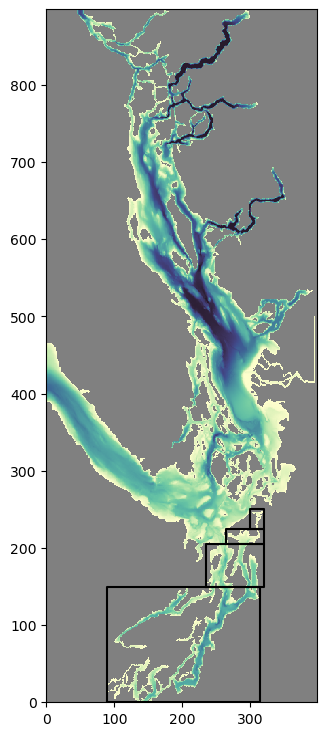

In [22]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

Puget Sound is a biologically important region of the Salish Sea with unique characteristics ___. Seperated from the Fraser River Plume by the Haro Mixing Region, and with a high ratio of coastline to water, PS is influenced by the Fraser but potentially not dominated by it. There are three main categories of rivers so talk about with regards to PS: rivers inside PS, rivers with mouths in the strait of Juan de Fuca, and rivers with mouths north of the Haro mixing region. Of those northern rivers, the Fraser river is by far the largest and therefore has the potential to impact the flow of other rivers into puget sound.

In [23]:
# # Run once then comment out
# meters_fraser, prop_fraser = make_m_and_prop(PS_all, 'fraser_river')
# meters_nooksack, prop_nooksack = make_m_and_prop(PS_all, 'nooksack_river')
# meters_skagit, prop_skagit = make_m_and_prop(PS_all, 'skagit_river')
# meters_snohomish, prop_snohomish = make_m_and_prop(PS_all, 'snohomish_river')
# meters_nisqually, prop_nisqually = make_m_and_prop(PS_all, 'nisqually_river')
# meters_elwha, prop_elwha = make_m_and_prop(PS_all, 'elwha_river')
# meters_cowichan, prop_cowichan = make_m_and_prop(PS_all, 'cowichan_river')
# meters_nanaimo, prop_nanaimo = make_m_and_prop(PS_all, 'nanaimo_river')
# meters_puntledge, prop_puntledge = make_m_and_prop(PS_all, 'puntledge_river')
# meters_salmon, prop_salmon = make_m_and_prop(PS_all, 'salmon_river')
# meters_homathko, prop_homathko = make_m_and_prop(PS_all, 'homathko_river')
# meters_squamish, prop_squamish = make_m_and_prop(PS_all, 'squamish_river')
# meters_other, prop_other = make_m_and_prop(PS_all, 'other_rivers')

In [24]:
# # Run once then comment out
# meters_ds_PS = xr.Dataset({
#     'nooksack_river': meters_nooksack,
#     'skagit_river': meters_skagit,
#     'snohomish_river': meters_snohomish,
#     'nisqually_river': meters_nisqually,
#     'elwha_river': meters_elwha,
#     'cowichan_river': meters_cowichan,
#     'nanaimo_river': meters_nanaimo,
#     'puntledge_river': meters_puntledge,
#     'salmon_river': meters_salmon,
#     'homathko_river': meters_homathko,
#     'squamish_river': meters_squamish,
#     'fraser_river': meters_fraser,
#     'other_rivers': meters_other
# })

# prop_ds_PS = xr.Dataset({
#     'nooksack_river': prop_nooksack,
#     'skagit_river': prop_skagit,
#     'snohomish_river': prop_snohomish,
#     'nisqually_river': prop_nisqually,
#     'elwha_river': prop_elwha,
#     'cowichan_river': prop_cowichan,
#     'nanaimo_river': prop_nanaimo,
#     'puntledge_river': prop_puntledge,
#     'salmon_river': prop_salmon,
#     'homathko_river': prop_homathko,
#     'squamish_river': prop_squamish,
#     'fraser_river': prop_fraser,
#     'other_rivers': prop_other
# })

# meters_ds_PS.to_netcdf('PS_daily_m_freshwater.nc')
# prop_ds_PS.to_netcdf('PS_daily_prop_freshwater.nc')

In [25]:
meters_ds_PS = xr.open_dataset('PS_daily_m_freshwater.nc')
prop_ds_PS = xr.open_dataset('PS_daily_prop_freshwater.nc')

In [26]:
meters_ds_PS_2019 = meters_ds_PS.sel(time=slice('2019-01-01', '2019-12-31'))
meters_ds_PS_2020 = meters_ds_PS.sel(time=slice('2020-01-01', '2020-12-31')).drop_sel(time='2020-02-29T12:00:00.000000000')
meters_ds_PS_2021 = meters_ds_PS.sel(time=slice('2021-01-01', '2021-12-31'))
meters_ds_PS_2022 = meters_ds_PS.sel(time=slice('2022-01-01', '2022-12-31'))
meters_ds_PS_2023 = meters_ds_PS.sel(time=slice('2023-01-01', '2023-12-31'))

In [27]:
prop_ds_PS_2019 = prop_ds_PS.sel(time=slice('2019-01-01', '2019-12-31'))
prop_ds_PS_2020 = prop_ds_PS.sel(time=slice('2020-01-01', '2020-12-31')).drop_sel(time='2020-02-29T12:00:00.000000000')
prop_ds_PS_2021 = prop_ds_PS.sel(time=slice('2021-01-01', '2021-12-31'))
prop_ds_PS_2022 = prop_ds_PS.sel(time=slice('2022-01-01', '2022-12-31'))
prop_ds_PS_2023 = prop_ds_PS.sel(time=slice('2023-01-01', '2023-12-31'))

In [28]:
total_meters_ds_PS = meters_ds_PS.to_array().sum(dim="variable")

In [29]:
list(meters_ds_PS.keys())

['nooksack_river',
 'skagit_river',
 'snohomish_river',
 'nisqually_river',
 'elwha_river',
 'cowichan_river',
 'nanaimo_river',
 'puntledge_river',
 'salmon_river',
 'homathko_river',
 'squamish_river',
 'fraser_river',
 'other_rivers']

## Monthly

In [30]:
# selected_m_2019_mon = make_selected_meter(PS_all, meters_sum_2019_mon)
# selected_m_2020_mon = make_selected_meter(PS_all, meters_sum_2020_mon)
# selected_m_2021_mon = make_selected_meter(PS_all, meters_sum_2021_mon)
# selected_m_2022_mon = make_selected_meter(PS_all, meters_sum_2022_mon)
# selected_m_2023_mon = make_selected_meter(PS_all, meters_sum_2023_mon)
# selected_m_all_mon = xr.concat([selected_m_2019_mon, selected_m_2020_mon, selected_m_2021_mon, selected_m_2022_mon, selected_m_2023_mon], dim='time')
# selected_m_all_mon

In [31]:
# sel_m_mean_2019_mon = selected_m_2019_mon.mean(dim='gridY').mean(dim='gridX')
# sel_m_mean_2020_mon = selected_m_2020_mon.mean(dim='gridY').mean(dim='gridX')
# sel_m_mean_2021_mon = selected_m_2021_mon.mean(dim='gridY').mean(dim='gridX')
# sel_m_mean_2022_mon = selected_m_2022_mon.mean(dim='gridY').mean(dim='gridX')
# sel_m_mean_2023_mon = selected_m_2023_mon.mean(dim='gridY').mean(dim='gridX')
# sel_m_mean_all_mon = xr.concat([sel_m_mean_2019_mon, sel_m_mean_2020_mon, sel_m_mean_2021_mon, sel_m_mean_2022_mon, sel_m_mean_2023_mon], dim='time')
# sel_m_mean_all_mon

In [32]:
# tot_sel_2019_mon = sel_m_mean_2019_mon.to_array().sum(dim="variable")
# tot_sel_2020_mon = sel_m_mean_2020_mon.to_array().sum(dim="variable")
# tot_sel_2021_mon = sel_m_mean_2021_mon.to_array().sum(dim="variable")
# tot_sel_2022_mon = sel_m_mean_2022_mon.to_array().sum(dim="variable")
# tot_sel_2023_mon = sel_m_mean_2023_mon.to_array().sum(dim="variable")
# tot_sel_all_mon = xr.concat([tot_sel_2019_mon, tot_sel_2020_mon, tot_sel_2021_mon, tot_sel_2022_mon, tot_sel_2023_mon], dim='time')
# tot_sel_all_mon

In [33]:
# sel_prop_2019_mon = sel_m_mean_2019_mon / tot_sel_2019_mon  # prop is the dim1 volume of fw divided by all freshwater, for each river, giving pct contribution of freshwater! 1d in time for each river
# sel_prop_2020_mon = sel_m_mean_2020_mon / tot_sel_2020_mon
# sel_prop_2021_mon = sel_m_mean_2021_mon / tot_sel_2021_mon
# sel_prop_2022_mon = sel_m_mean_2022_mon / tot_sel_2022_mon
# sel_prop_2023_mon = sel_m_mean_2023_mon / tot_sel_2023_mon
# sel_prop_all_mon = xr.concat([sel_prop_2019_mon, sel_prop_2020_mon, sel_prop_2021_mon, sel_prop_2022_mon, sel_prop_2023_mon], dim='time')
# sel_prop_all_mon

In [34]:
# (selected_m_2019_mon['fraser_river'][10] - selected_m_2019_mon['fraser_river'][6]).plot()

In [35]:
# dim1_2019_mon = make_1d(sum_2019_mon, PS_all)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
# dim1_2020_mon = make_1d(sum_2020_mon, PS_all)
# dim1_2021_mon = make_1d(sum_2021_mon, PS_all)
# dim1_2022_mon = make_1d(sum_2022_mon, PS_all)
# dim1_2023_mon = make_1d(sum_2023_mon, PS_all)
# dim1_all_mon = xr.concat([dim1_2019_mon, dim1_2020_mon, dim1_2021_mon, dim1_2022_mon, dim1_2023_mon], dim='time')

In [36]:
# meters1_2019_mon = dim1_2019_mon/total_area  # meters1 is the sum of all the water in the region divided by the total area of the regions. is 1d in time for each river
# meters1_2020_mon = dim1_2020_mon/total_area
# meters1_2021_mon = dim1_2021_mon/total_area
# meters1_2022_mon = dim1_2022_mon/total_area
# meters1_2023_mon = dim1_2023_mon/total_area
# meters1_all_mon = xr.concat([meters1_2019_mon, meters1_2020_mon, meters1_2021_mon, meters1_2022_mon, meters1_2023_mon], dim='time')

In [37]:
# totals_2019_mon = dim1_2019_mon.to_array().sum(dim="variable")  # totals is the sum of all freshwater in the region from all the rivers. 1d in time and not sep by river
# totals_2020_mon = dim1_2020_mon.to_array().sum(dim="variable")
# totals_2021_mon = dim1_2021_mon.to_array().sum(dim="variable")
# totals_2022_mon = dim1_2022_mon.to_array().sum(dim="variable")
# totals_2023_mon = dim1_2023_mon.to_array().sum(dim="variable")
# totals_all_mon = xr.concat([totals_2019_mon, totals_2020_mon, totals_2021_mon, totals_2022_mon, totals_2023_mon], dim='time')

In [38]:
# prop_2019_mon = dim1_2019_mon/totals_2019_mon  # prop is the dim1 volume of fw divided by all freshwater, for each river, giving pct contribution of freshwater! 1d in time for each river
# prop_2020_mon = dim1_2020_mon/totals_2020_mon
# prop_2021_mon = dim1_2021_mon/totals_2021_mon
# prop_2022_mon = dim1_2022_mon/totals_2022_mon
# prop_2023_mon = dim1_2023_mon/totals_2023_mon
# prop_all_mon = xr.concat([prop_2019_mon, prop_2020_mon, prop_2021_mon, prop_2022_mon, prop_2023_mon], dim='time')

## Totals

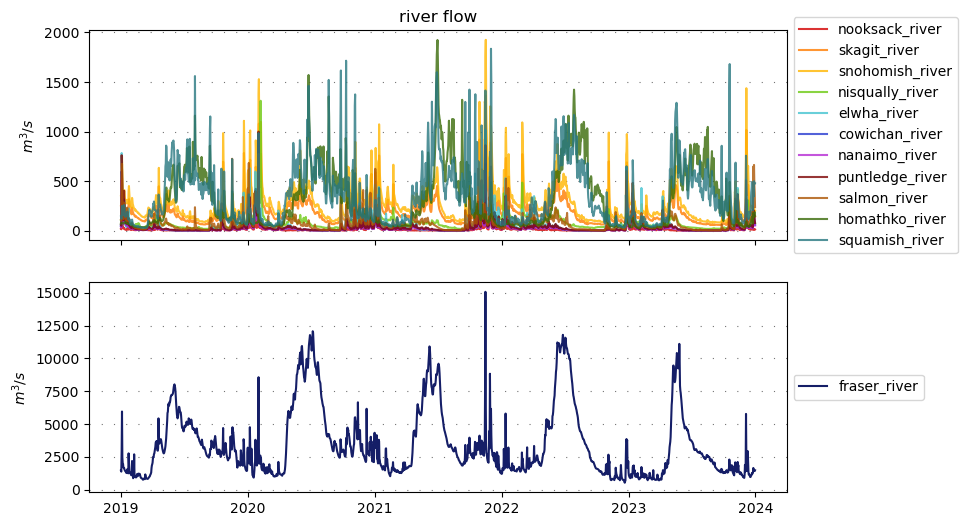

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys[:-2]:
    ax[0].plot(river_flows_202108['date'], river_flows_202108[river_dict[key]].values, label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, alpha=0.8)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('river flow')
    ax[0].set_ylabel(r'$m^3/s$')
    i += 1

ax[1].plot(river_flows_202108['date'], river_flows_202108[river_dict['fraser_river']].values, label='fraser_river', color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, alpha=1)
ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax[1].set_ylabel(r'$m^3/s$')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.plot(river_flows_202108['date'], river_flows_202108['Skagit1 [m^3/s]'].values)

Daily flow values for all rivers in the domain are shown in the figure above. There is a clear seasonality to the flow, with the type of seasonality of the hydrograph falling under one of the following classifications: rainfall, snowmelt, glacial, or mixed. The hydrograph classification is linked to not only the timing of peak flow, but also to the variability of the flow on a day to day basis. In this 5 year sample set from 2019 to 2024, it's apparent that there have been historic year to year variations as well. In the Fraser River for example, the peak flow in 2019 is much lower than in any of the other years. In 2023, the oeak of the flow is still similar to other years, but the peak drops off very quickly in comparison to the rest of the years.

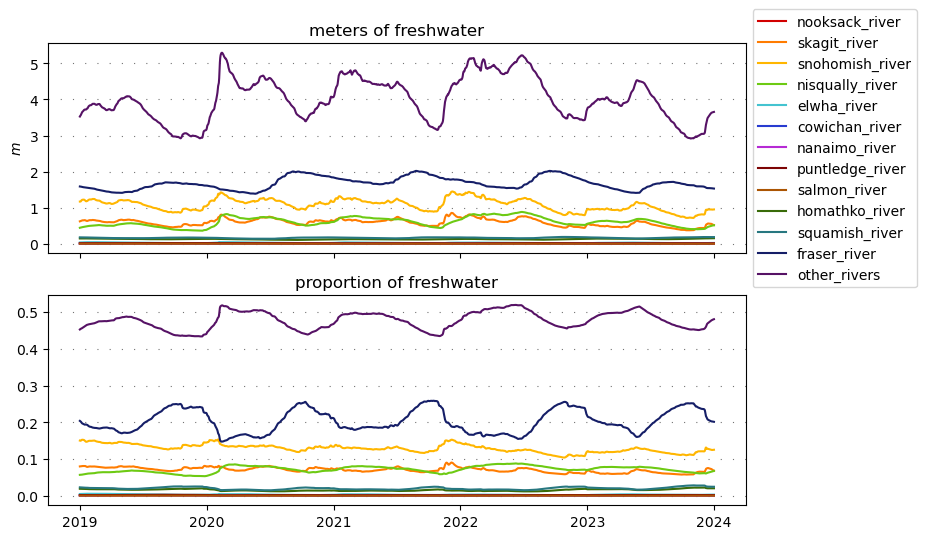

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

i = 0
for key in river_keys:
    ax[0].plot(meters_ds_PS['time'], meters_ds_PS[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, markersize=3)
    ax[0].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    ax[0].set_title('meters of freshwater')
    ax[0].set_ylabel(r'$m$')

    ax[1].plot(prop_ds_PS['time'], prop_ds_PS[key], label=key, color=colors_list8[i], linestyle=lines_list8[i], linewidth=1.5, markersize=3)
    ax[1].set_title('proportion of freshwater')
    ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
    i += 1

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, '$m$')

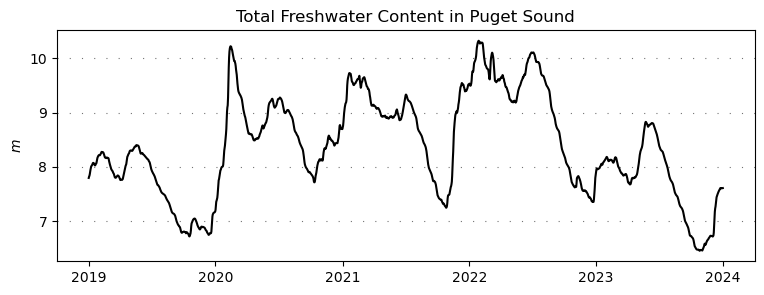

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)

ax.plot(total_meters_ds_PS['time'], total_meters_ds_PS, color='black', linewidth=1.5, markersize=3)
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax.set_title('Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'$m$')

Notice the double peaks here. Guessing the first is from local rivers and the second is from outside or Fraser, but should look into it more

## Inter-annual meters/prop comparisons

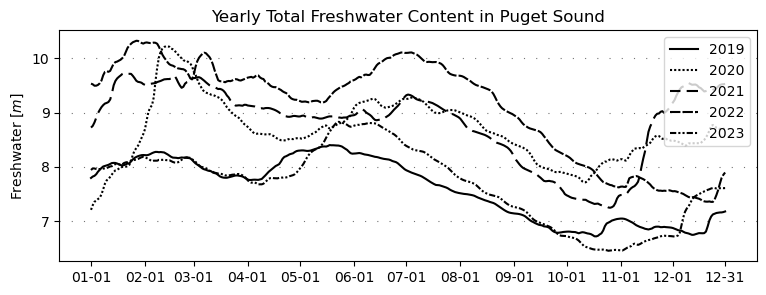

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True)
ax.plot(meters_ds_PS_2019['time'].dt.strftime('%m-%d'), meters_ds_PS_2019.to_array().sum(dim="variable"), label='2019', linestyle=year_lines[0], color='k', markersize=3)
ax.plot(meters_ds_PS_2020['time'].dt.strftime('%m-%d'), meters_ds_PS_2020.to_array().sum(dim="variable"), label='2020', linestyle=year_lines[1], color='k', markersize=3)
ax.plot(meters_ds_PS_2021['time'].dt.strftime('%m-%d'), meters_ds_PS_2021.to_array().sum(dim="variable"), label='2021', linestyle=year_lines[2], color='k', markersize=3)
ax.plot(meters_ds_PS_2022['time'].dt.strftime('%m-%d'), meters_ds_PS_2022.to_array().sum(dim="variable"), label='2022', linestyle=year_lines[3], color='k', markersize=3)
ax.plot(meters_ds_PS_2023['time'].dt.strftime('%m-%d'), meters_ds_PS_2023.to_array().sum(dim="variable"), label='2023', linestyle=year_lines[4], color='k', markersize=3)
ax.legend()
ax.set_title('Yearly Total Freshwater Content in Puget Sound')
ax.set_ylabel(r'Freshwater [$m$]')
ax.set_xticks(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01', '10-01', '11-01', '12-01', '12-31'])
ax.grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=14))  # nbins defines the maximum number of ticks

Notice how the second peak is shifted in 2019/2023 vs the other years! Look into that. Also notice the huge spike in February 2020 - this was likely one of the large atsmospheric events. There may be a chart of accumulated rainfall on Roland's site

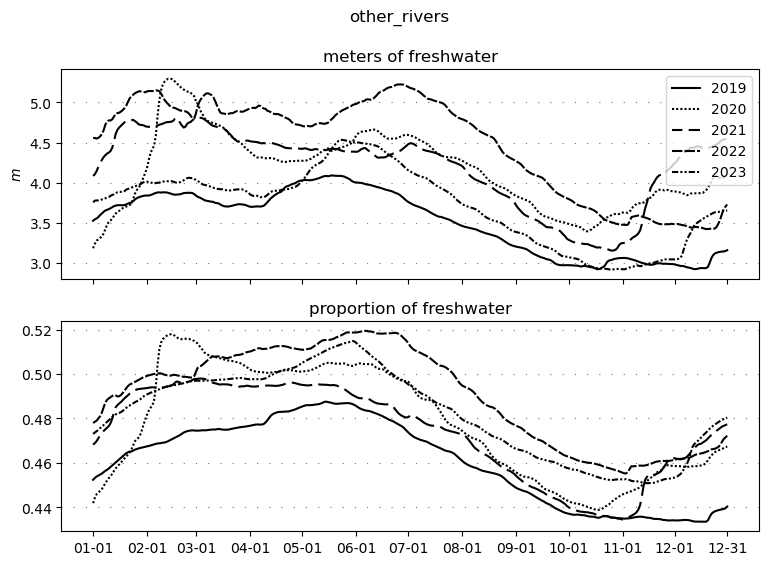

In [43]:
plot_river_years('other_rivers')

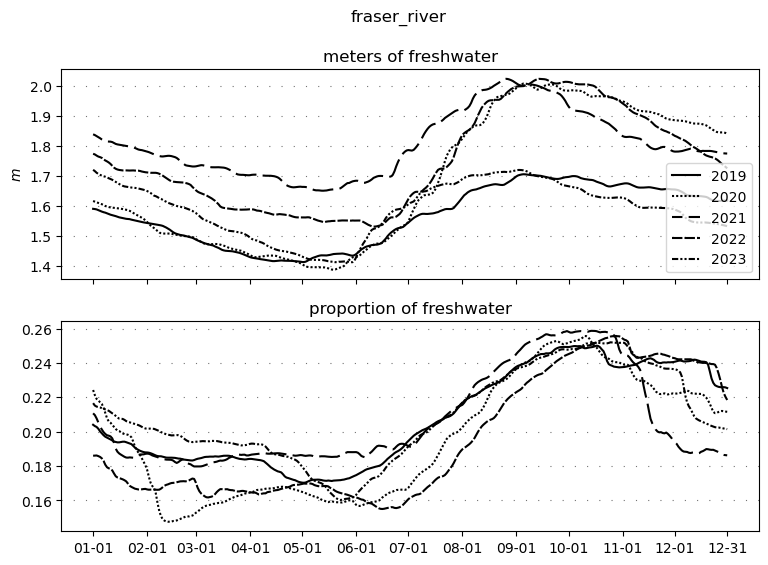

In [44]:
plot_river_years('fraser_river')  # interesting here: look at 2019 and 2023 where there are fewer meters of fw, but the proportion is the same

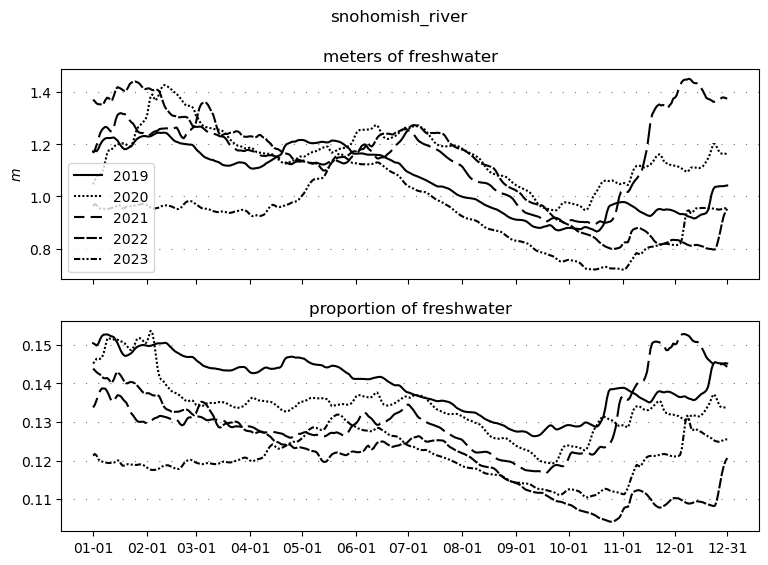

In [45]:
plot_river_years('snohomish_river')

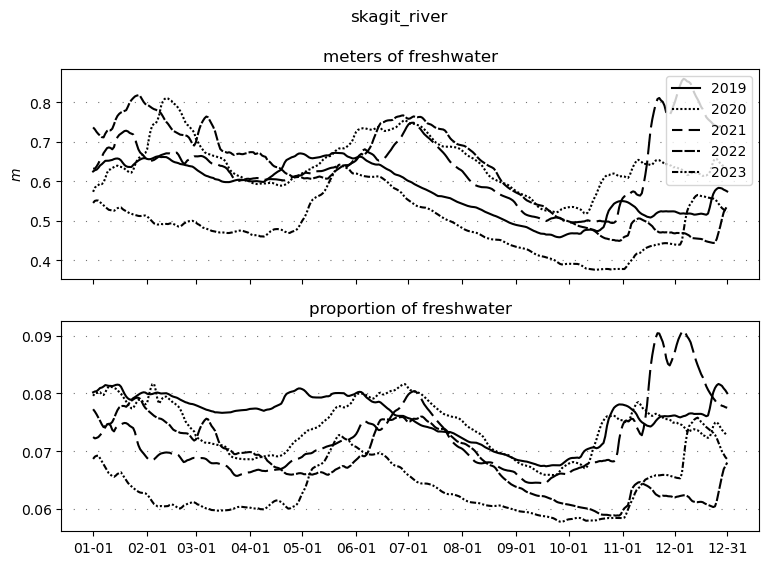

In [46]:
plot_river_years('skagit_river')

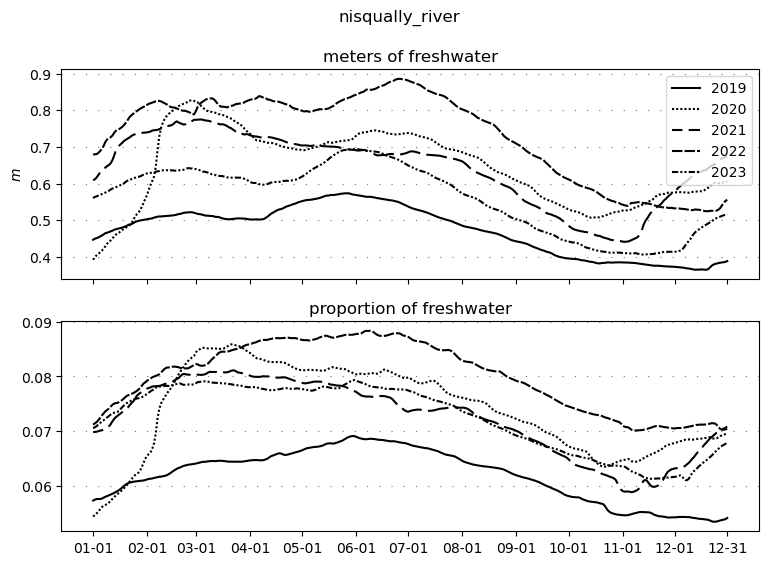

In [47]:
plot_river_years('nisqually_river')

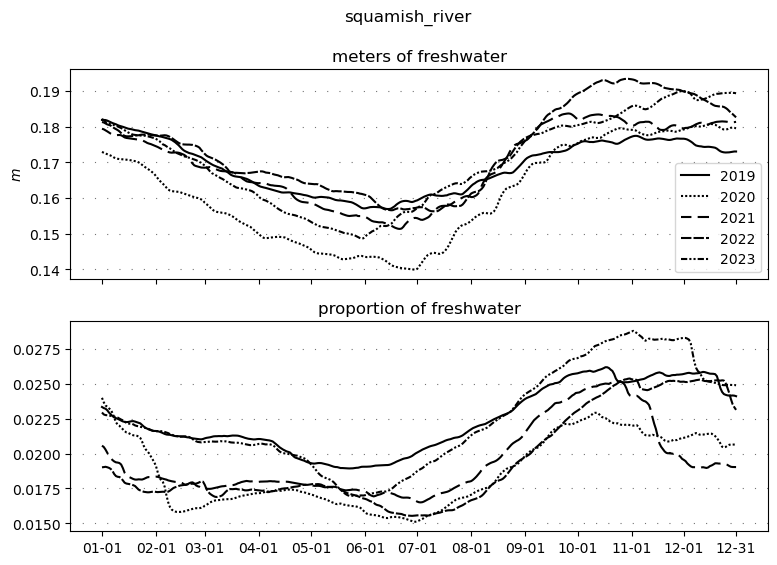

In [48]:
plot_river_years('squamish_river')

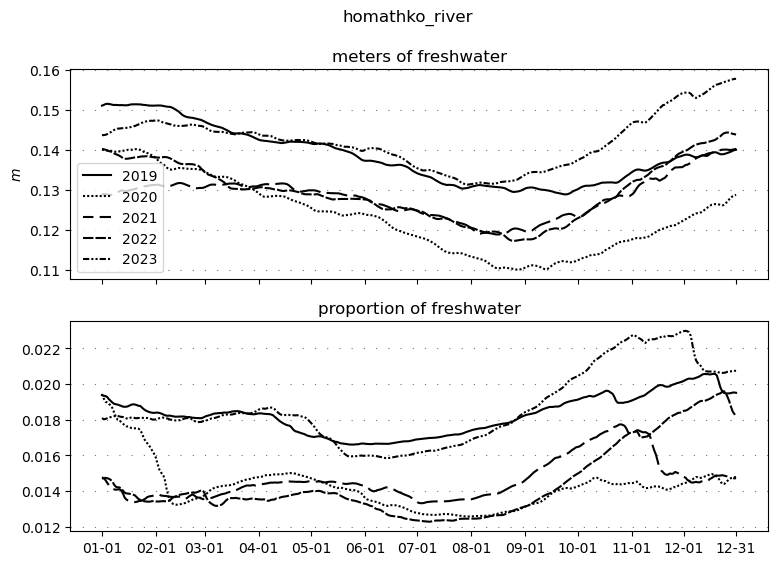

In [49]:
plot_river_years('homathko_river')  # interesting here that the homathko signal is much stronger in 2019 and 2023 both in prop and volume

## River Flow and PS Content

In [50]:
def plot_content_and_hydrograph(river):
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

    color1 = 'tab:blue'
    ax1.set_title('Total Model {} Water vs Hydrograph'.format(river))
    ax1.plot(meters_ds_PS['time'], meters_ds_PS[river], linestyle='--', color=color1)
    ax1.set_ylabel(r'Freshwater Content ($m$ Freshwater)', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    color2 = 'tab:red'
    ax2 = ax1.twinx()
    ax2.plot(meters_ds_PS['time'], river_flows_202108[river_dict[river]].values, color=color2)
    ax2.set_ylabel(r'Hydrograph ($m^3/s$)', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

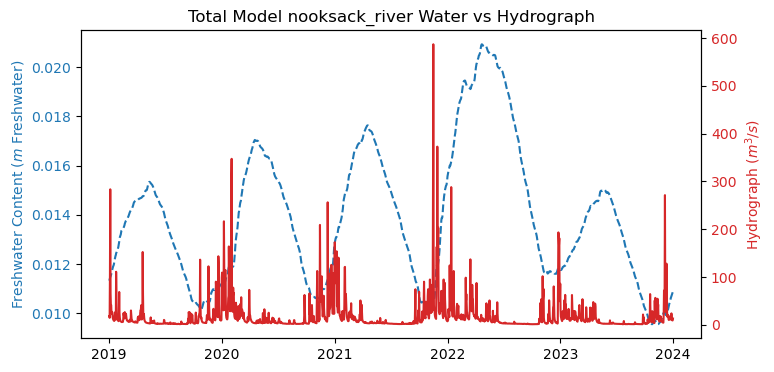

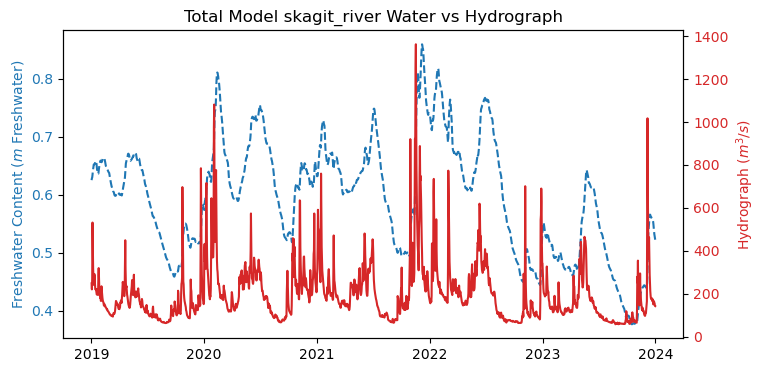

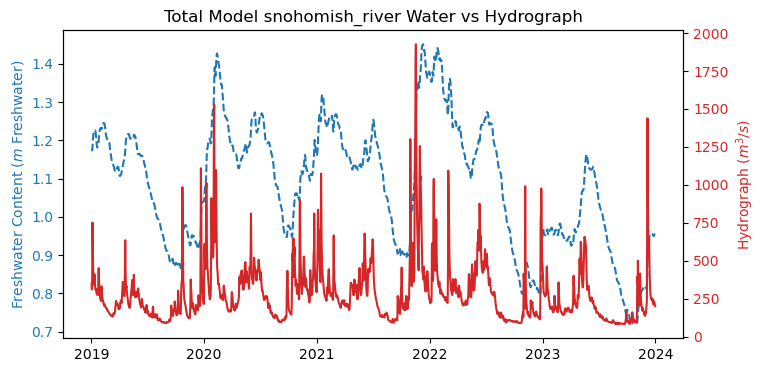

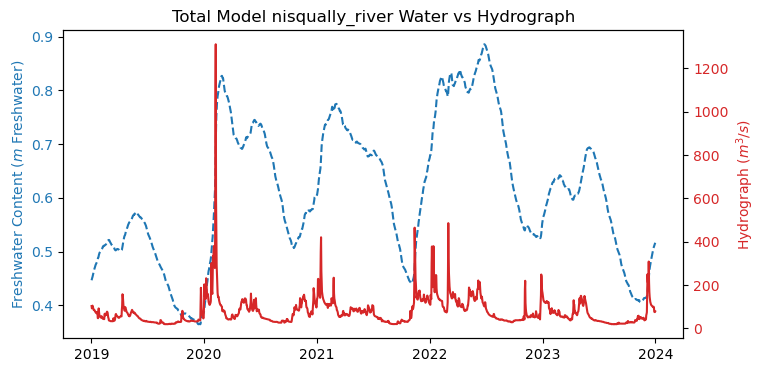

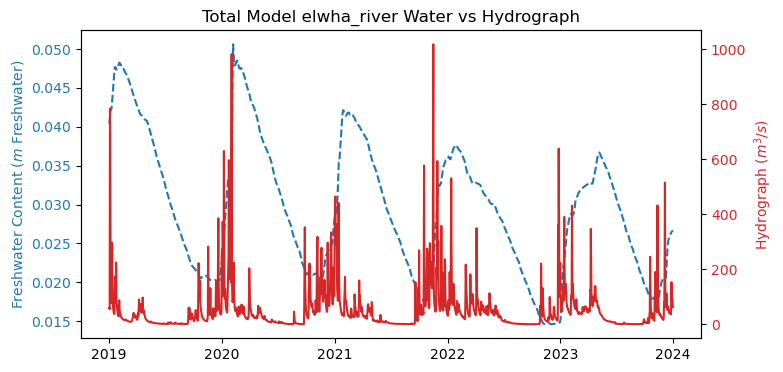

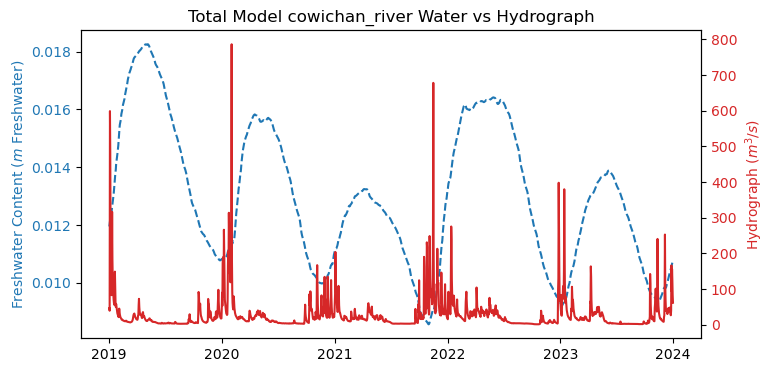

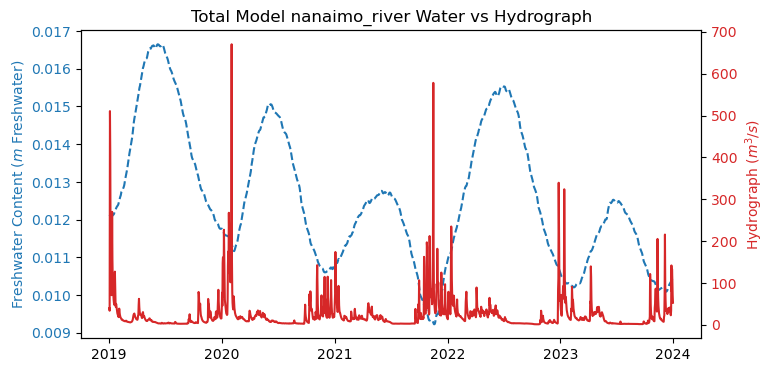

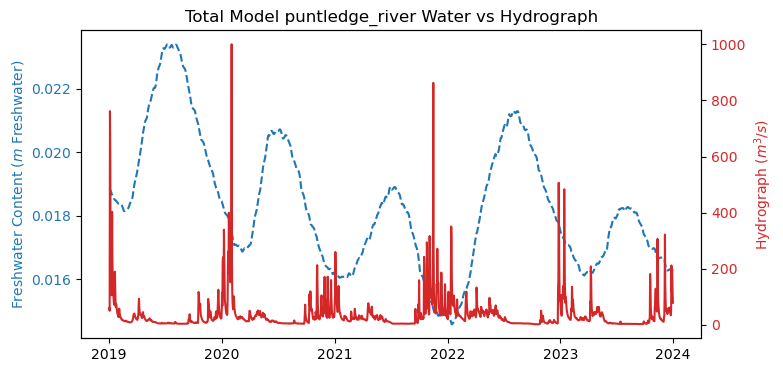

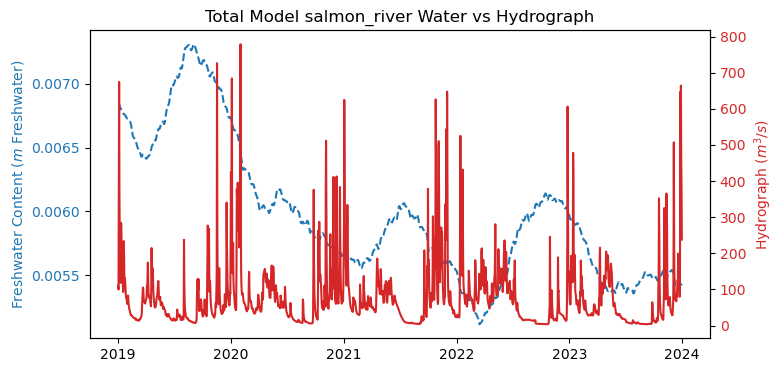

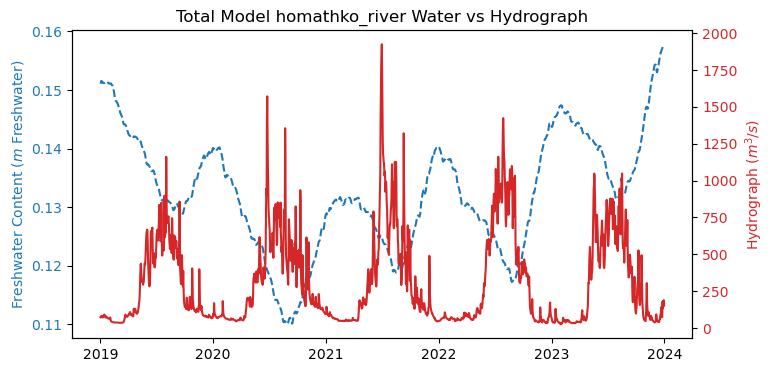

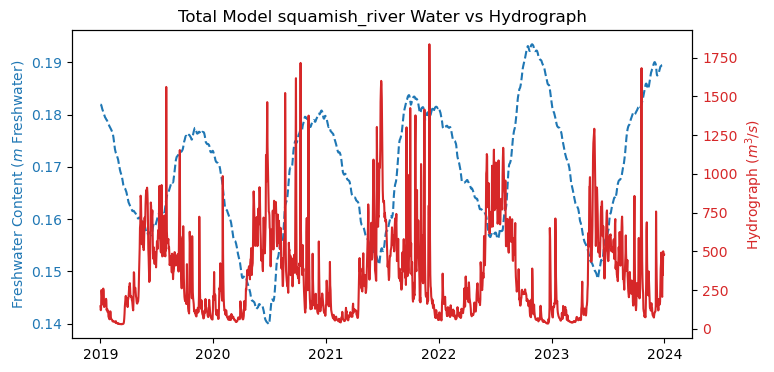

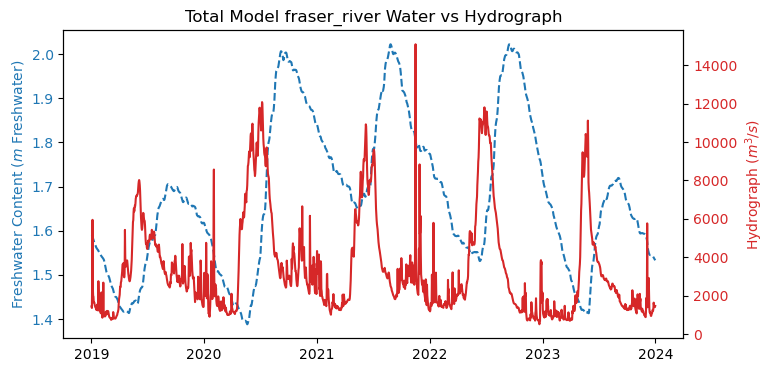

In [51]:
for river in river_keys[:-1]:
    plot_content_and_hydrograph(river)

## Concentration Cross Section Across PS Mouth

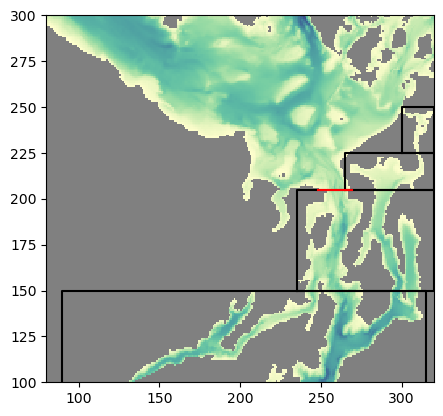

In [52]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
plot_box(ax, PS_main, 'k')
plot_box(ax, PS_AIWB, 'k')
plot_box(ax, PS_WB, 'k')
plot_box(ax, PS_DP, 'k')

plt.xlim([80, 320])
plt.ylim([100, 300])

plt.plot([248, 269], [205, 205], 'r')

In [53]:
tmask_mouthCS = tmask.sel(gridY=205, gridX=slice(248, 270))

In [54]:
vol_2019_mean_mouthCS = vol_2019_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
conc_2019_mean_mouthCS = vol_2019_mean_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2019_mean_mouthCS = phys_2019_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
sum_2019_mean_mouthCS = sum_2019_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')

In [55]:
vol_2019_may_mouthCS = vol_2019_mon.sel(gridY=205, gridX=slice(248, 269), time=slice('2019-05-01', '2019-05-31')).mean(dim='time')
conc_2019_may_mouthCS = vol_2019_may_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2019_may_mouthCS = phys_2019_mon.sel(gridY=205, gridX=slice(248, 269), time=slice('2019-05-01', '2019-05-31')).mean(dim='time')

In [56]:
vol_2019_jan_mouthCS = vol_2019_mon.sel(gridY=205, gridX=slice(248, 269), time=slice('2019-01-01', '2019-01-31')).mean(dim='time')
conc_2019_jan_mouthCS = vol_2019_jan_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2019_jan_mouthCS = phys_2019_mon.sel(gridY=205, gridX=slice(248, 269), time=slice('2019-01-01', '2019-01-31')).mean(dim='time')

In [57]:
vol_2020_mean_mouthCS = vol_2020_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
conc_2020_mean_mouthCS = vol_2020_mean_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2020_mean_mouthCS = phys_2020_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')

In [101]:
vol_2021_mean_mouthCS = vol_2021_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
conc_2021_mean_mouthCS = vol_2021_mean_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2021_mean_mouthCS = phys_2021_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')

In [102]:
vol_2022_mean_mouthCS = vol_2022_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
conc_2022_mean_mouthCS = vol_2022_mean_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2022_mean_mouthCS = phys_2022_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')

In [103]:
vol_2023_mean_mouthCS = vol_2023_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')
conc_2023_mean_mouthCS = vol_2023_mean_mouthCS / volume.sel(gridY=205, gridX=slice(248, 270))
phys_2023_mean_mouthCS = phys_2023_mon.sel(gridY=205, gridX=slice(248, 269)).mean(dim='time')

(130.0, 0.0)

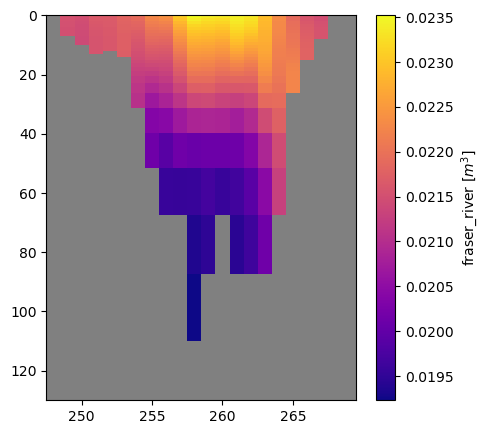

In [58]:
this_p_var = 'fraser_river'
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,1, figsize = (5, 5))

X = conc_2019_mean_mouthCS.gridX
Y = conc_2019_mean_mouthCS.depth
Z = np.ma.masked_array(conc_2019_mean_mouthCS[this_p_var], mask=tmask_mouthCS)

colours = ax.pcolormesh(X, Y, Z, cmap=cmap)

cb = fig.colorbar(colours, ax=ax, label=r'{} [$m^3$]'.format(this_p_var))
plt.ylim([130, 0])

In [59]:
def plot_mouth_CS(river, tmaskCS, conc_CS, phys_CS, cmin, cmax, smin, smax):
    this_p_var = river
    cmap = mpl.colormaps['plasma']
    cmap.set_bad('gray')

    fig, ax = plt.subplots(1,2, figsize = (12, 5))

    X = conc_CS.gridX
    Y = conc_CS.depth
    Z = np.ma.masked_array(conc_CS[this_p_var], mask=tmaskCS)
    colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
    cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format(this_p_var))
    ax[0].set_ylim([130, 0])

    cmap = cm.haline
    cmap.set_bad('gray')
    X = phys_CS.gridX
    Y = phys_CS.depth
    Z = np.ma.masked_array(phys_CS['vosaline'], mask=tmaskCS)
    colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
    cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
    ax[1].set_ylim([130, 0])

In [60]:
avgdep_2019_mean_mouthCS = (vol_2019_mean_mouthCS * e3t_3d.sel(gridY=205, gridX=slice(248, 270))) / sum_2019_mean_mouthCS

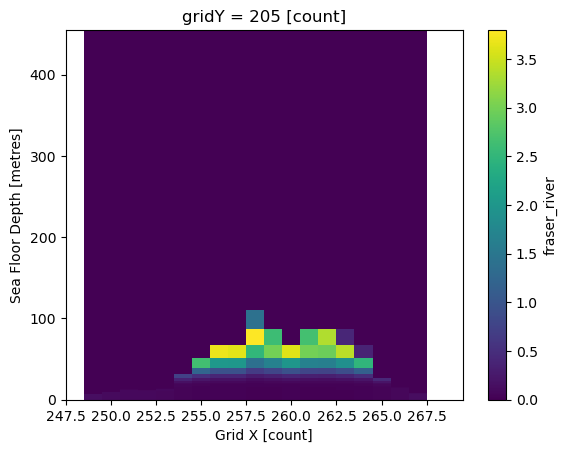

In [61]:
avgdep_2019_mean_mouthCS['fraser_river'].plot()

(130.0, 0.0)

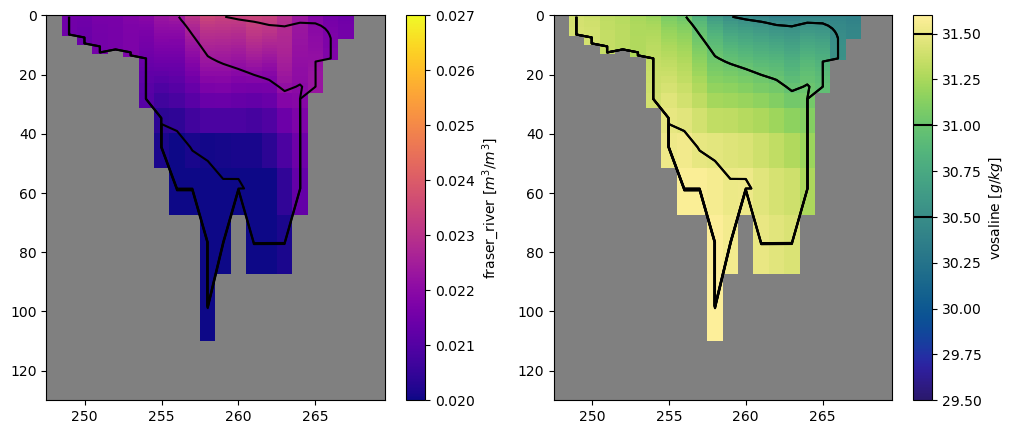

In [85]:
cmin=0.02
cmax=0.027
smin=29.5
smax=31.6
# cmin=None
# cmax=None
# smin=None
# smax=None
this_p_var = 'fraser_river'
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

cont1 = ax[0].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')
cont2 = ax[1].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')

X = conc_2019_mean_mouthCS.gridX
Y = conc_2019_mean_mouthCS.depth
Z = np.ma.masked_array(conc_2019_mean_mouthCS[this_p_var], mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format(this_p_var))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2019_mean_mouthCS.gridX
Y = phys_2019_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2019_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
cont2 = ax[1].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')
cb.add_lines(cont2)
ax[1].set_ylim([130, 0])

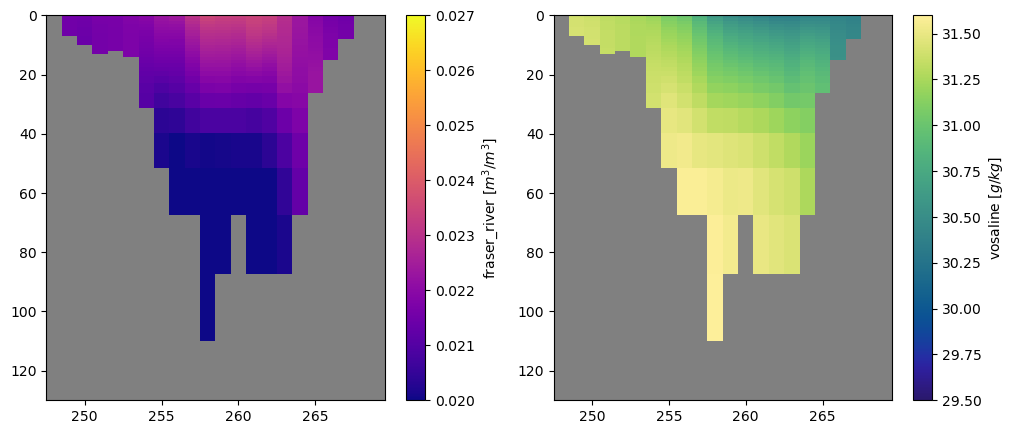

In [63]:
plot_mouth_CS('fraser_river', tmask_mouthCS, conc_2019_mean_mouthCS, phys_2019_mean_mouthCS, cmin=0.02, cmax=0.027, smin=29.5, smax=31.6)

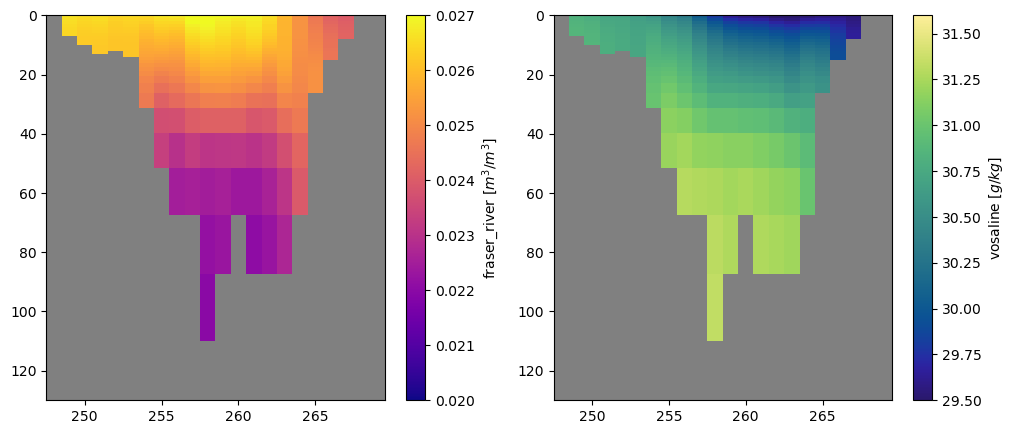

In [64]:
plot_mouth_CS('fraser_river', tmask_mouthCS, conc_2020_mean_mouthCS, phys_2020_mean_mouthCS, cmin=0.02, cmax=0.027, smin=29.5, smax=31.6)

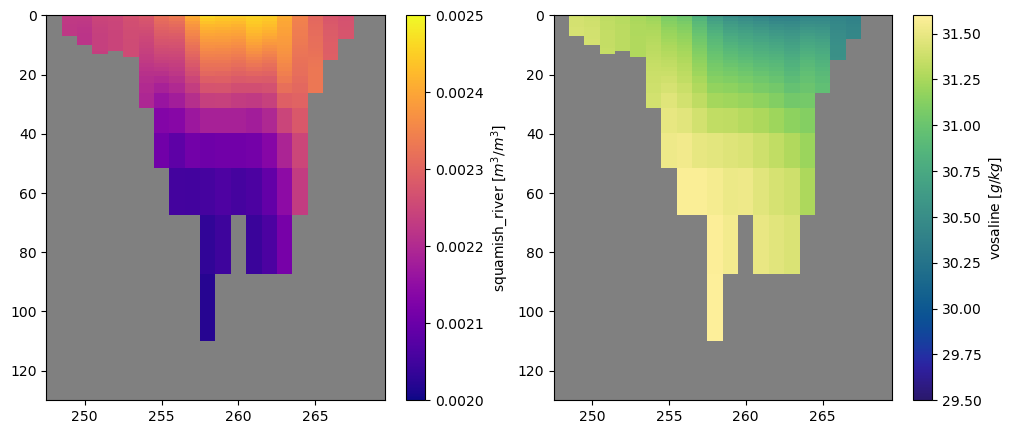

In [65]:
plot_mouth_CS('squamish_river', tmask_mouthCS, conc_2019_mean_mouthCS, phys_2019_mean_mouthCS, cmin=0.002, cmax=0.0025, smin=29.5, smax=31.6)

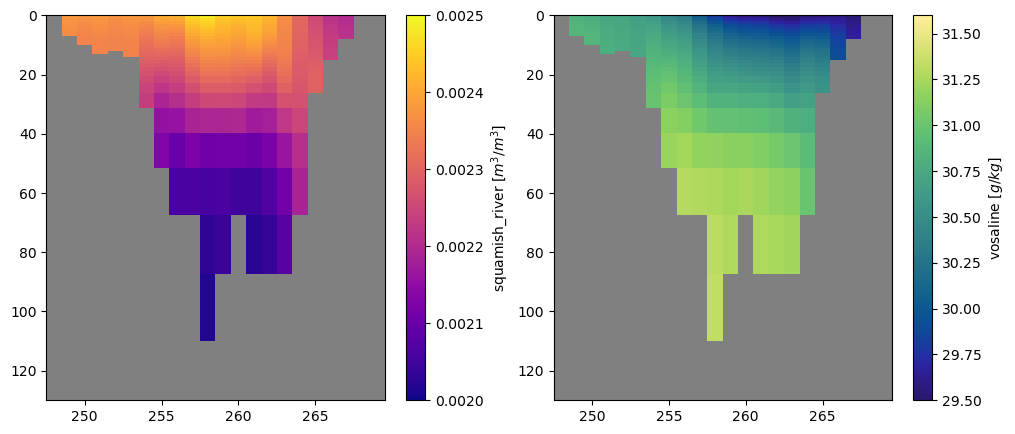

In [66]:
plot_mouth_CS('squamish_river', tmask_mouthCS, conc_2020_mean_mouthCS, phys_2020_mean_mouthCS, cmin=0.002, cmax=0.0025, smin=29.5, smax=31.6)

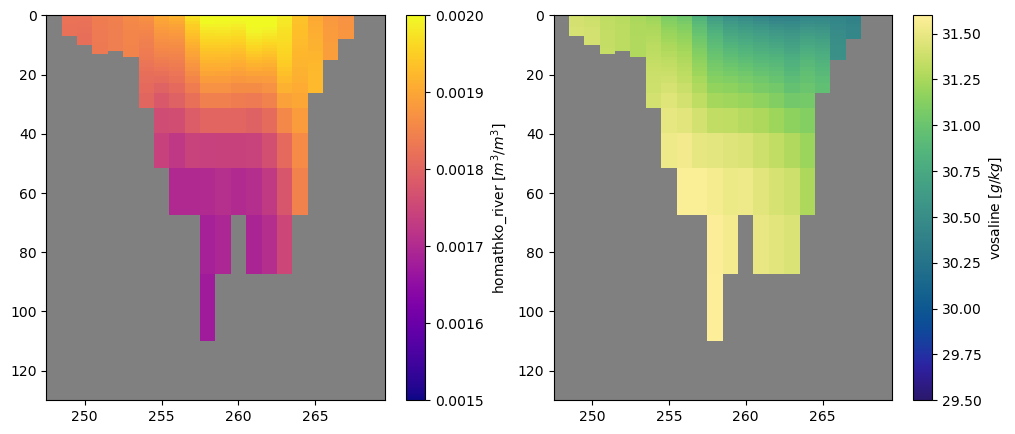

In [67]:
plot_mouth_CS('homathko_river', tmask_mouthCS, conc_2019_mean_mouthCS, phys_2019_mean_mouthCS, cmin=0.0015, cmax=0.002, smin=29.5, smax=31.6)

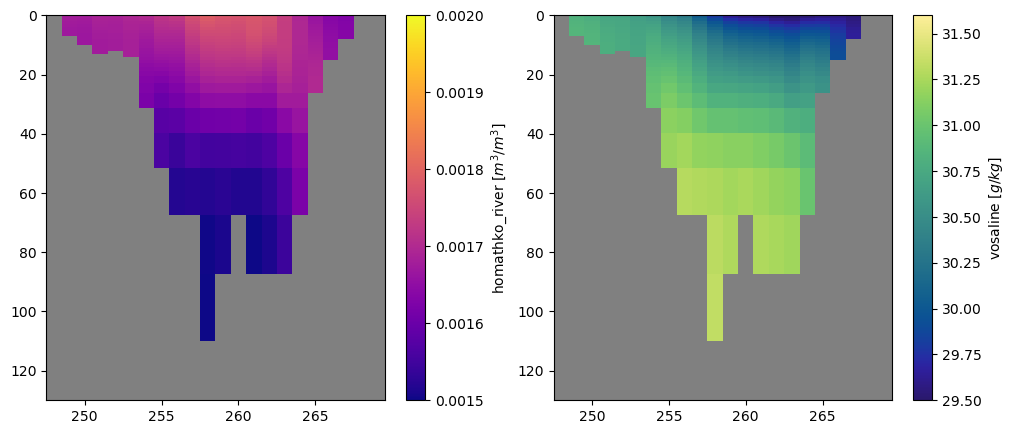

In [68]:
plot_mouth_CS('homathko_river', tmask_mouthCS, conc_2020_mean_mouthCS, phys_2020_mean_mouthCS, cmin=0.0015, cmax=0.002, smin=29.5, smax=31.6)

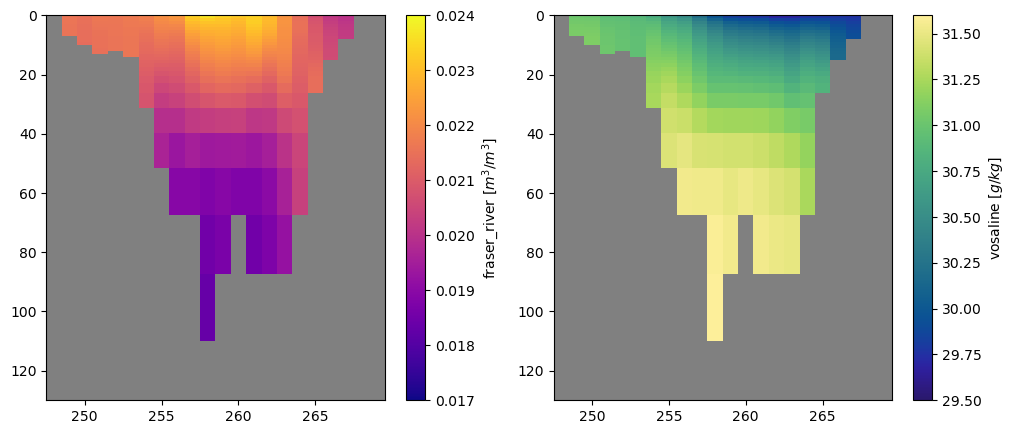

In [69]:
plot_mouth_CS('fraser_river', tmask_mouthCS, conc_2019_may_mouthCS, phys_2019_may_mouthCS, cmin=0.017, cmax=0.024, smin=29.5, smax=31.6)

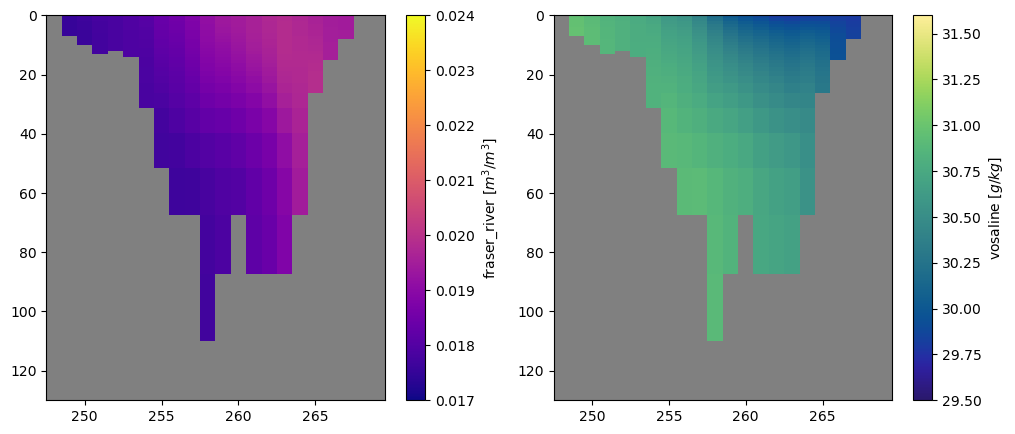

In [70]:
plot_mouth_CS('fraser_river', tmask_mouthCS, conc_2019_jan_mouthCS, phys_2019_jan_mouthCS, cmin=0.017, cmax=0.024, smin=29.5, smax=31.6)

## What I actually should be plotting along this cross section (and in plane view) is percentage of freshwater? This assumed that all freshwater is coming directly from the rivers

In [106]:
conctot_2019_mean_mouthCS = conc_2019_mean_mouthCS.to_array().sum(dim="variable")
conctot_2020_mean_mouthCS = conc_2020_mean_mouthCS.to_array().sum(dim="variable")
conctot_2021_mean_mouthCS = conc_2021_mean_mouthCS.to_array().sum(dim="variable")
conctot_2022_mean_mouthCS = conc_2022_mean_mouthCS.to_array().sum(dim="variable")
conctot_2023_mean_mouthCS = conc_2023_mean_mouthCS.to_array().sum(dim="variable")

In [151]:
conctot_all_mean_mouthCS = np.concatenate([conctot_2019_mean_mouthCS, conctot_2020_mean_mouthCS, conctot_2021_mean_mouthCS, conctot_2022_mean_mouthCS, conctot_2023_mean_mouthCS])
conctot_all_mean_mouthCS[conctot_all_mean_mouthCS==0] = np.nan
phys_all_mean_mouthCS = xr.concat([phys_2019_mean_mouthCS, phys_2020_mean_mouthCS, phys_2021_mean_mouthCS, phys_2022_mean_mouthCS, phys_2023_mean_mouthCS], dim='time')
sal_all_mean_mouthCS = phys_all_mean_mouthCS.vosaline.to_numpy()
sal_all_mean_mouthCS[sal_all_mean_mouthCS==0] = np.nan

(130.0, 0.0)

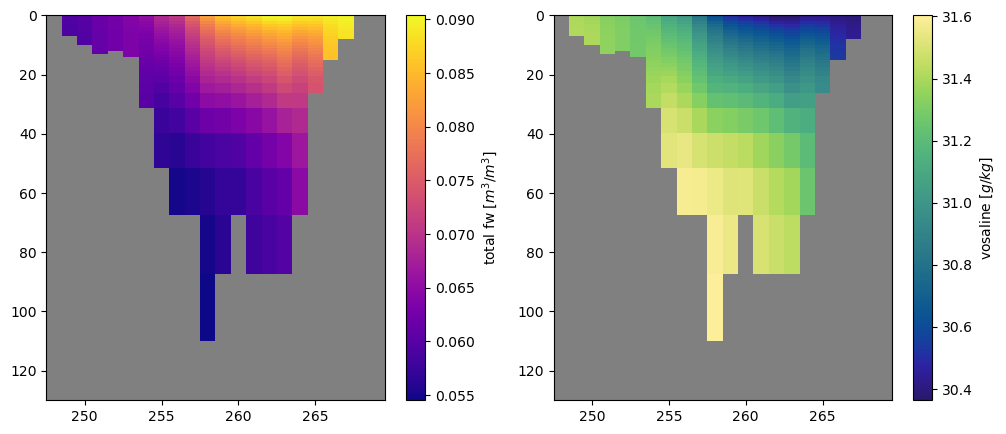

In [95]:
# cmin=0.02
# cmax=0.027
# smin=29.5
# smax=31.6
cmin=None
cmax=None
smin=None
smax=None
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

# cont1 = ax[0].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')
# cont2 = ax[1].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')

X = conctot_2019_mean_mouthCS.gridX
Y = conctot_2019_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2019_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2019_mean_mouthCS.gridX
Y = phys_2019_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2019_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
# cont2 = ax[1].contour(phys_2019_mean_mouthCS['gridX'], phys_2019_mean_mouthCS['depth'], phys_2019_mean_mouthCS['vosaline'], [30.5, 31, 31.5], colors='black')
# cb.add_lines(cont2)
ax[1].set_ylim([130, 0])

(130.0, 0.0)

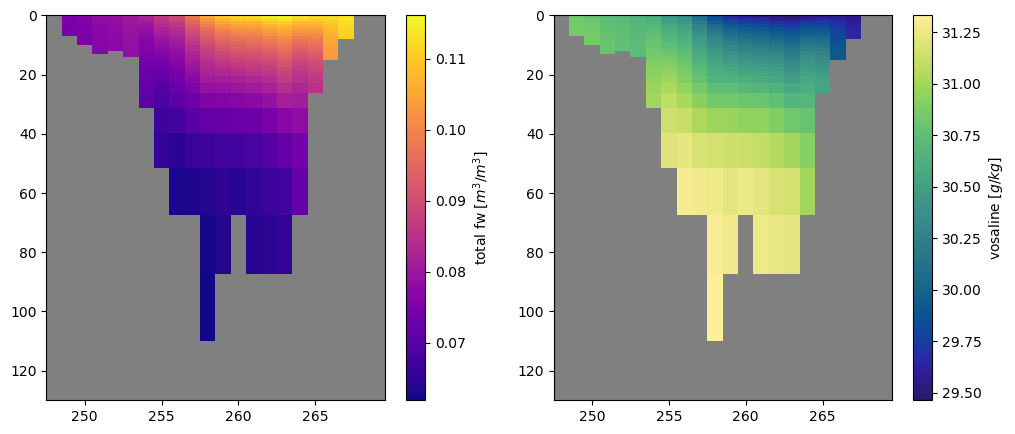

In [100]:
cmin=None
cmax=None
smin=None
smax=None
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

X = conctot_2020_mean_mouthCS.gridX
Y = conctot_2020_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2020_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2020_mean_mouthCS.gridX
Y = phys_2020_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2020_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1].set_ylim([130, 0])

(130.0, 0.0)

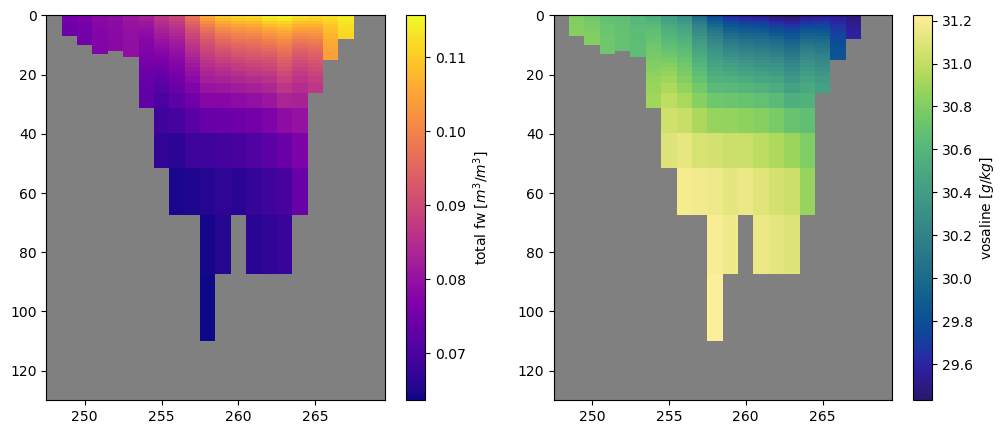

In [107]:
cmin=None
cmax=None
smin=None
smax=None
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

X = conctot_2021_mean_mouthCS.gridX
Y = conctot_2021_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2021_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2021_mean_mouthCS.gridX
Y = phys_2021_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2021_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1].set_ylim([130, 0])

(130.0, 0.0)

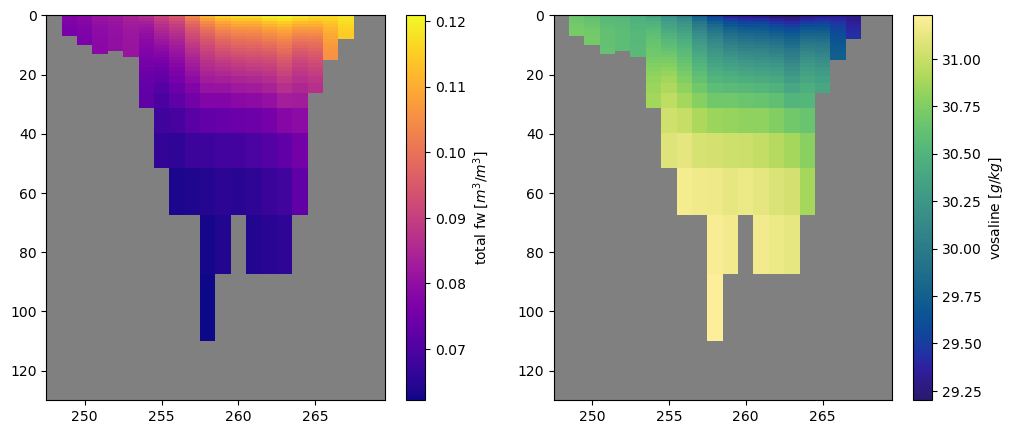

In [108]:
cmin=None
cmax=None
smin=None
smax=None
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

X = conctot_2022_mean_mouthCS.gridX
Y = conctot_2022_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2022_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2022_mean_mouthCS.gridX
Y = phys_2022_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2022_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1].set_ylim([130, 0])

(130.0, 0.0)

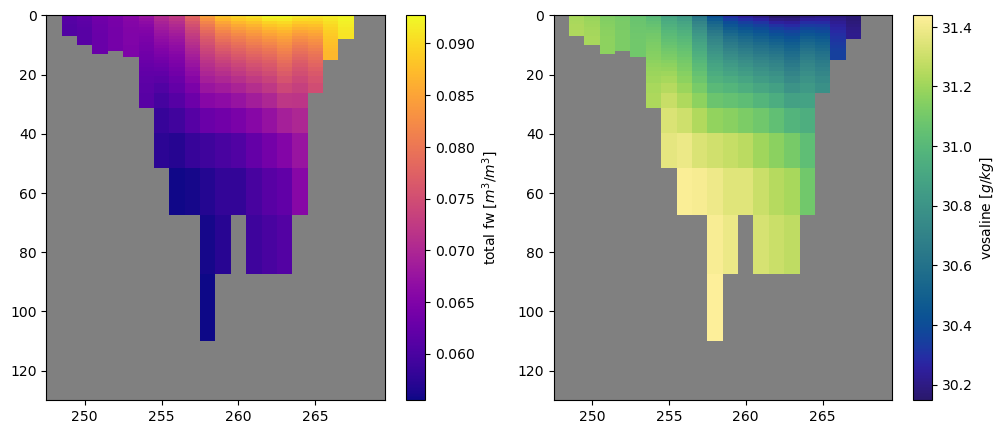

In [109]:
cmin=None
cmax=None
smin=None
smax=None
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(1,2, figsize = (12, 5))

X = conctot_2023_mean_mouthCS.gridX
Y = conctot_2023_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2023_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0].set_ylim([130, 0])

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2023_mean_mouthCS.gridX
Y = phys_2023_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2023_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1].set_ylim([130, 0])

(130.0, 0.0)

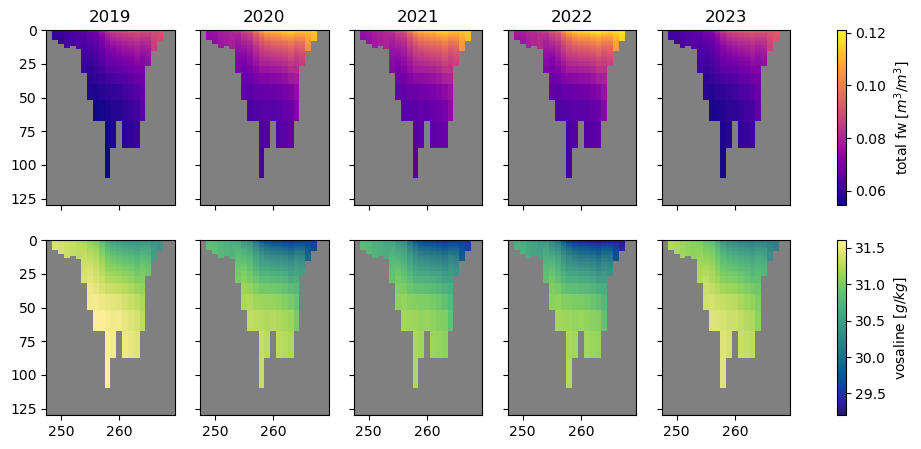

In [155]:
cmin=np.nanmin(conctot_all_mean_mouthCS)
cmax=np.nanmax(conctot_all_mean_mouthCS)
smin=np.nanmin(phys_all_mean_mouthCS['vosaline'])
smax=np.nanmax(phys_all_mean_mouthCS['vosaline'])
cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')

fig, ax = plt.subplots(2,5, figsize = (12, 5), sharex=True, sharey=True)

X = conctot_2019_mean_mouthCS.gridX
Y = conctot_2019_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2019_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0,0].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
# cb = fig.colorbar(colours, ax=ax[0,0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0,0].set_ylim([130, 0])
ax[0,0].set_title('2019')

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2019_mean_mouthCS.gridX
Y = phys_2019_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2019_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1,0].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
# cb = fig.colorbar(colours, ax=ax[1,0], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1,0].set_ylim([130, 0])

cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')
X = conctot_2020_mean_mouthCS.gridX
Y = conctot_2020_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2020_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0,1].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
# cb = fig.colorbar(colours, ax=ax[0,1], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0,1].set_ylim([130, 0])
ax[0,1].set_title('2020')

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2020_mean_mouthCS.gridX
Y = phys_2020_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2020_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1,1].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
# cb = fig.colorbar(colours, ax=ax[1,1], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1,1].set_ylim([130, 0])

cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')
X = conctot_2021_mean_mouthCS.gridX
Y = conctot_2021_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2021_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0,2].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
# cb = fig.colorbar(colours, ax=ax[0,0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0,2].set_ylim([130, 0])
ax[0,2].set_title('2021')

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2021_mean_mouthCS.gridX
Y = phys_2021_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2021_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1,2].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
# cb = fig.colorbar(colours, ax=ax[1,2], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1,2].set_ylim([130, 0])


cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')
X = conctot_2022_mean_mouthCS.gridX
Y = conctot_2022_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2022_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0,3].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
# cb = fig.colorbar(colours, ax=ax[0,0], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0,3].set_ylim([130, 0])
ax[0,3].set_title('2022')

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2022_mean_mouthCS.gridX
Y = phys_2022_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2022_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1,3].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
# cb = fig.colorbar(colours, ax=ax[1,3], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1,3].set_ylim([130, 0])


cmap = mpl.colormaps['plasma']
cmap.set_bad('gray')
X = conctot_2023_mean_mouthCS.gridX
Y = conctot_2023_mean_mouthCS.depth
Z = np.ma.masked_array(conctot_2023_mean_mouthCS, mask=tmask_mouthCS)
colours = ax[0,4].pcolormesh(X, Y, Z, cmap=cmap, vmin=cmin, vmax=cmax)
cb = fig.colorbar(colours, ax=ax[0,:], label=r'{} [$m^3$/$m^3$]'.format('total fw'))
ax[0,4].set_ylim([130, 0])
ax[0,4].set_title('2023')

cmap = cm.haline
cmap.set_bad('gray')
X = phys_2023_mean_mouthCS.gridX
Y = phys_2023_mean_mouthCS.depth
Z = np.ma.masked_array(phys_2023_mean_mouthCS['vosaline'], mask=tmask_mouthCS)
colours = ax[1,4].pcolormesh(X, Y, Z, cmap=cmap, vmin=smin, vmax=smax)
cb = fig.colorbar(colours, ax=ax[1,:], label=r'{} [$g/kg$]'.format('vosaline'))
ax[1,4].set_ylim([130, 0])

## Thalweg Plots

In [163]:
from matplotlib import pylab

In [160]:
grid = xr.open_dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy = grid.variables['Bathymetry'][:,:]
thalweg = np.loadtxt('puget_thalweg.txt', delimiter=' ', dtype=int)

(-20.0, 330.0)

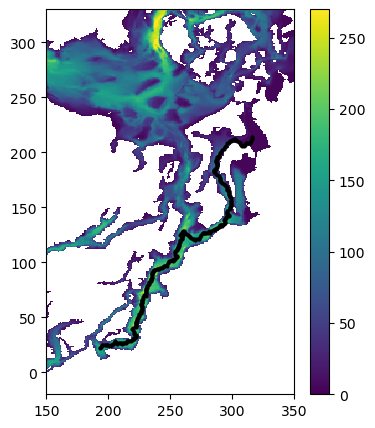

In [167]:
fig,ax = plt.subplots(1,1,figsize=(4,5))
cmin=0; cmax=270;
ps=ax.pcolormesh(bathy,vmin=cmin,vmax=cmax,cmap='viridis') # This will have to be changed in orderto get a clearer view of the Puget thalweg.
fig.colorbar(ps)

ax.plot(thalweg[:,1]+1,thalweg[:,0]+1,marker='o',color='k',ms=2)
ax.set_xlim(150,350)
ax.set_ylim(-20,330)

# for k in range (1,6):
#     pylab.plot(thalweg[k*39,1]+1, thalweg[k*39,0]+1,'o')
#     print(thalweg[k*39,1] + 1, thalweg[k*39,0] + 1)

In [172]:
#open bathy file and meshmask
g=xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_20120101_20121231.nc')
fbathy=xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
il=5

ValueError: dimensions ('y', 'x') must have the same length as the number of data dimensions, ndim=1

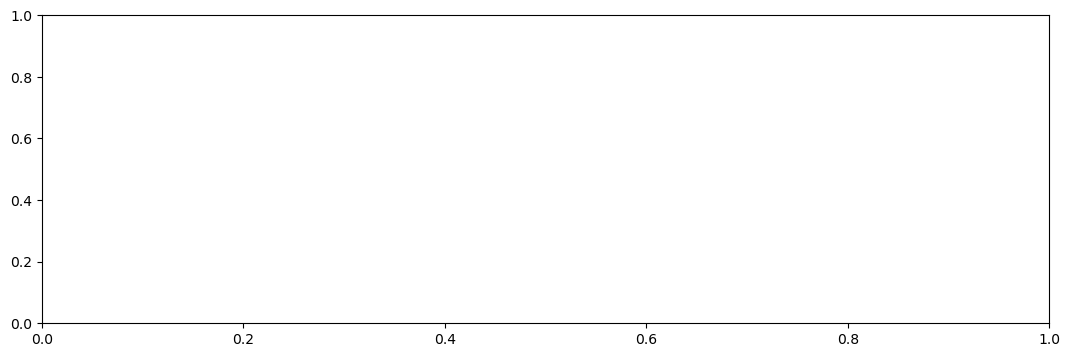

In [174]:
fig,ax=plt.subplots(1,1,figsize=(13,4))
modvar='vosaline'
cb=visualisations.contour_thalweg(ax,g.variables[modvar][il,...],fbathy,fmesh,clevels='salinity',cmap=cm.amp,thalweg_file='puget_thalweg.txt',
                                  cbar_args={'label':modvar})

In [190]:
bathy

<xarray.Variable (y: 898, x: 398)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Attributes:
    units:      metres
    long_name:  sea_floor_depth

In [191]:
p_var = 'fraser_river'
time_idx = 0
dep_thal, distance, var_thal = visualisations.load_thalweg(
                vol_2023_mon.depth[0, ...], np.array(vol_2023_mon[p_var][time_idx]), bathy['gridY'][:], bathy['gridX'][:],
                thalweg)

TypeError: invalid indexer array, does not have integer dtype: array('gridY', dtype='<U5')